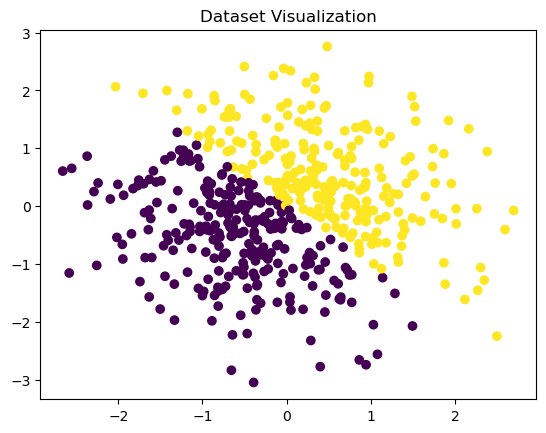

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset
np.random.seed(0)
n_samples = 500

# Generate features
X = np.random.randn(n_samples, 2)  # 500 samples, 2 features

# Generate labels (0 or 1)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Dataset Visualization")
plt.show()

Accuracy: 0.98


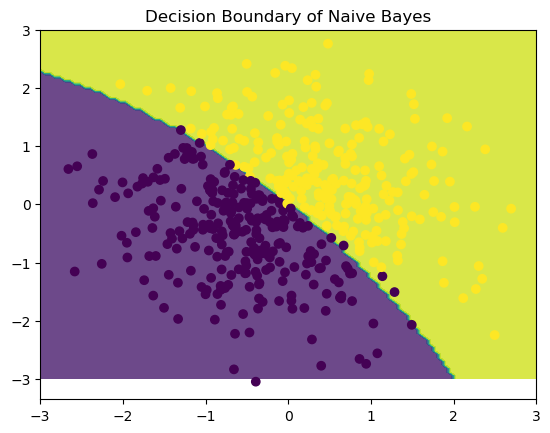

In [2]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        # Store classes and their priors
        self.classes = np.unique(y)
        self.priors = np.array([np.mean(y == c) for c in self.classes])
        
        # Calculate mean and variance for each feature and class
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.variances = np.zeros((len(self.classes), X.shape[1]))
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[i, :] = X_c.mean(axis=0)
            self.variances[i, :] = X_c.var(axis=0)
    
    def predict(self, X):
        # Calculate log probability for each class
        log_probs = np.zeros((X.shape[0], len(self.classes)))
        
        for i, c in enumerate(self.classes):
            mean = self.means[i]
            var = self.variances[i]
            log_prior = np.log(self.priors[i])
            log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * var)) - 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
            log_probs[:, i] = log_prior + log_likelihood
        
        return self.classes[np.argmax(log_probs, axis=1)]

# Initialize and train the Naive Bayes model
nb = GaussianNaiveBayes()
nb.fit(X, y)

# Make predictions
y_pred = nb.predict(X)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = nb.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Boundary of Naive Bayes")
plt.show()
